# Chapter 18: Topic Modelling (Top2Vec)
### Roman Egger
##### <italic>Salzburg University of Applied Sciences - Department: Innovation and Management in Tourism</italic>

---

In this Jupyter Notebook, we will do a complete topic modelling walkthrough with a dataset from airbnb using three different topic-modeling approches: "Latent Dirichlet Allocation" <strong>(LDA)</strong>, None- Negative Matrix Factorizaton <strong>(NMF)</strong> and Correlation Expanation <strong>CorEX</strong>.

The dataset we will use to extract topics from was crawled by the author and contains 2890 descriptions of airbnb-Experiences from the following European cities: Amsterdam, Athens, Berlin, Brussels, Copenhagen, Helsinki, London, Madrid, Oslo, Paris, Prague, Rome, Stockholm, Viwenna and Warsaw. 
Open the dataset (csv) [here](data/Airbnb_total.csv)

<img src="data/paris.jpg">

---
[See such an airbnb example](https://www.airbnb.com/experiences/356769?currentTab=experience_tab&federatedSearchId=9297b301-0091-433b-899d-0bcda11332a9&searchId=&sectionId=704c8a0a-1f93-4442-b6b5-44b52d817c5b&source=p2)


---
### We will go through the following steps:
* #### Data Preperation & Preprocessing


<hr>

Aknowledgement:<br>
This notebook is based on the [Top2vec Project by Dimo Angelov](https://pypi.org/project/top2vec/)
<br>
[Related paper: TOP2VEC: DISTRIBUTED REPRESENTATIONS OF TOPICS](https://arxiv.org/pdf/2008.09470.pdf)

In [1]:
import pandas as pd
from top2vec import Top2Vec
import umap 
import numpy as np
from  plotting_utils import *

df = pd.read_csv(r'./data/Airbnb_total.csv', encoding="utf-8", sep=";")
df = df.drop(columns=['ID', 'ID.1'])
df

,City,Todo
0,Amsterdam,First of all we want to thank you all for choo...
1,Amsterdam,We will have an exclusive Morning boat tour th...
2,Amsterdam,*PLEASE NOTE THIS IS A FREE TOUR CONCEPT*\n(1 ...
3,Amsterdam,"For our Winter Warmer Premium Cruise, we invit..."
4,Amsterdam,"I am a social media photographer, and I would ..."
...,...,...
2885,Warschau,"The price is per trip, a group of four pays th..."
2886,Warschau,Travel back in time and visit the Royal Castle...
2887,Warschau,"After a warm welcome, You will listen to a ve..."
2888,Warschau,"I invite you to the cooking school, which is l..."


In [2]:
df=df.dropna(subset=["Todo"]).reset_index(drop=True)

In [3]:
Row_list = []
for index, rows in df.iterrows():
    my_list = [rows.Todo]
    Row_list.append(my_list)

print(Row_list[0:1])

[['First of all we want to thank you all for choosing our experience. We are proud to announce that we have won an award from Airbnb for the most popular experience! Besides that we received more than 75 different nationalities on board. This would never have been possible without you ❤️\n\n \nDo you want to experience Amsterdam in a more authentic way? Especially in winter time the canals are overwhelming beautiful. The sun is low and sometimes the roofs of the storehouses, churches and monumental houses are covered with snow. You don’t have to be afraid for the cold, because our heated cushions, blankets and stove will guarantee you a comfortable boat trip.\n\nSo step aboard on our stylish luxury sloop with enough space for everyone and discover the city like a real explorer. We’ll welcome you with enough cold and hot drinks and delicious Dutch snacks and will give you an unforgettable experience. Lean back, relax and listen to our amazing stories about the secrets of Amsterdam. Beca

In [4]:
Row_list = [r[0] for r in Row_list]
model = Top2Vec(documents=Row_list, speed="learn", workers=8)

2021-05-31 12:07:40,257 - top2vec - INFO - Pre-processing documents for training
2021-05-31 12:07:41,895 - top2vec - INFO - Creating joint document/word embedding
2021-05-31 12:08:02,806 - top2vec - INFO - Creating lower dimension embedding of documents
2021-05-31 12:08:16,332 - top2vec - INFO - Finding dense areas of documents
2021-05-31 12:08:16,459 - top2vec - INFO - Finding topics


## Get number of Topics
This will return the topics in decreasing size

In [5]:
model.get_num_topics()

26

In [6]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [7]:
topic_words, word_scores, topic_nums = model.get_topics(1)

We are going to search for topics most similar to "experience".

In [8]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["experience"], num_topics=5)

In [9]:
topic_nums

array([ 0,  9,  1,  8, 25], dtype=int64)

In [10]:
topic_words

[array(['shoot', 'photo', 'send', 'capture', 'photoshoot', 'pictures',
        'locations', 'photos', 'camera', 'couples', 'shooting',
        'photographer', 'memories', 'if', 'possible', 'edited', 'couple',
        'souvenir', 'portrait', 'images', 'please', 'professional',
        'photography', 'high', 'photographs', 'message', 'spots', 'media',
        'want', 'days', 'receive', 'session', 'keep', 'instagram',
        'private', 'background', 'model', 'within', 'me', 'your', 'shots',
        'book', 'taken', 'help', 'contact', 'ask', 'time', 'idea',
        'available', 'location'], dtype='<U13'),
 array(['dame', 'paris', 'notre', 'charming', 'saint', 'stroll', 'must',
        'louvre', 'world', 'monuments', 'district', 'historic', 'discover',
        'famous', 'architecture', 'germain', 'see', 'tour', 'des',
        'monument', 'explore', 'life', 'eiffel', 'gardens', 'place',
        'oldest', 'anecdotes', 'passing', 'history', 'known', 'visit',
        'behind', 'sights', 'bigge

Topic Scores - Je höher die Scores desto ähnlicher ist das Topic "experience" - mit cosine similarity. (1-0)

In [11]:
topic_scores

array([0.49866048, 0.4434836 , 0.4411016 , 0.43194342, 0.42895643])

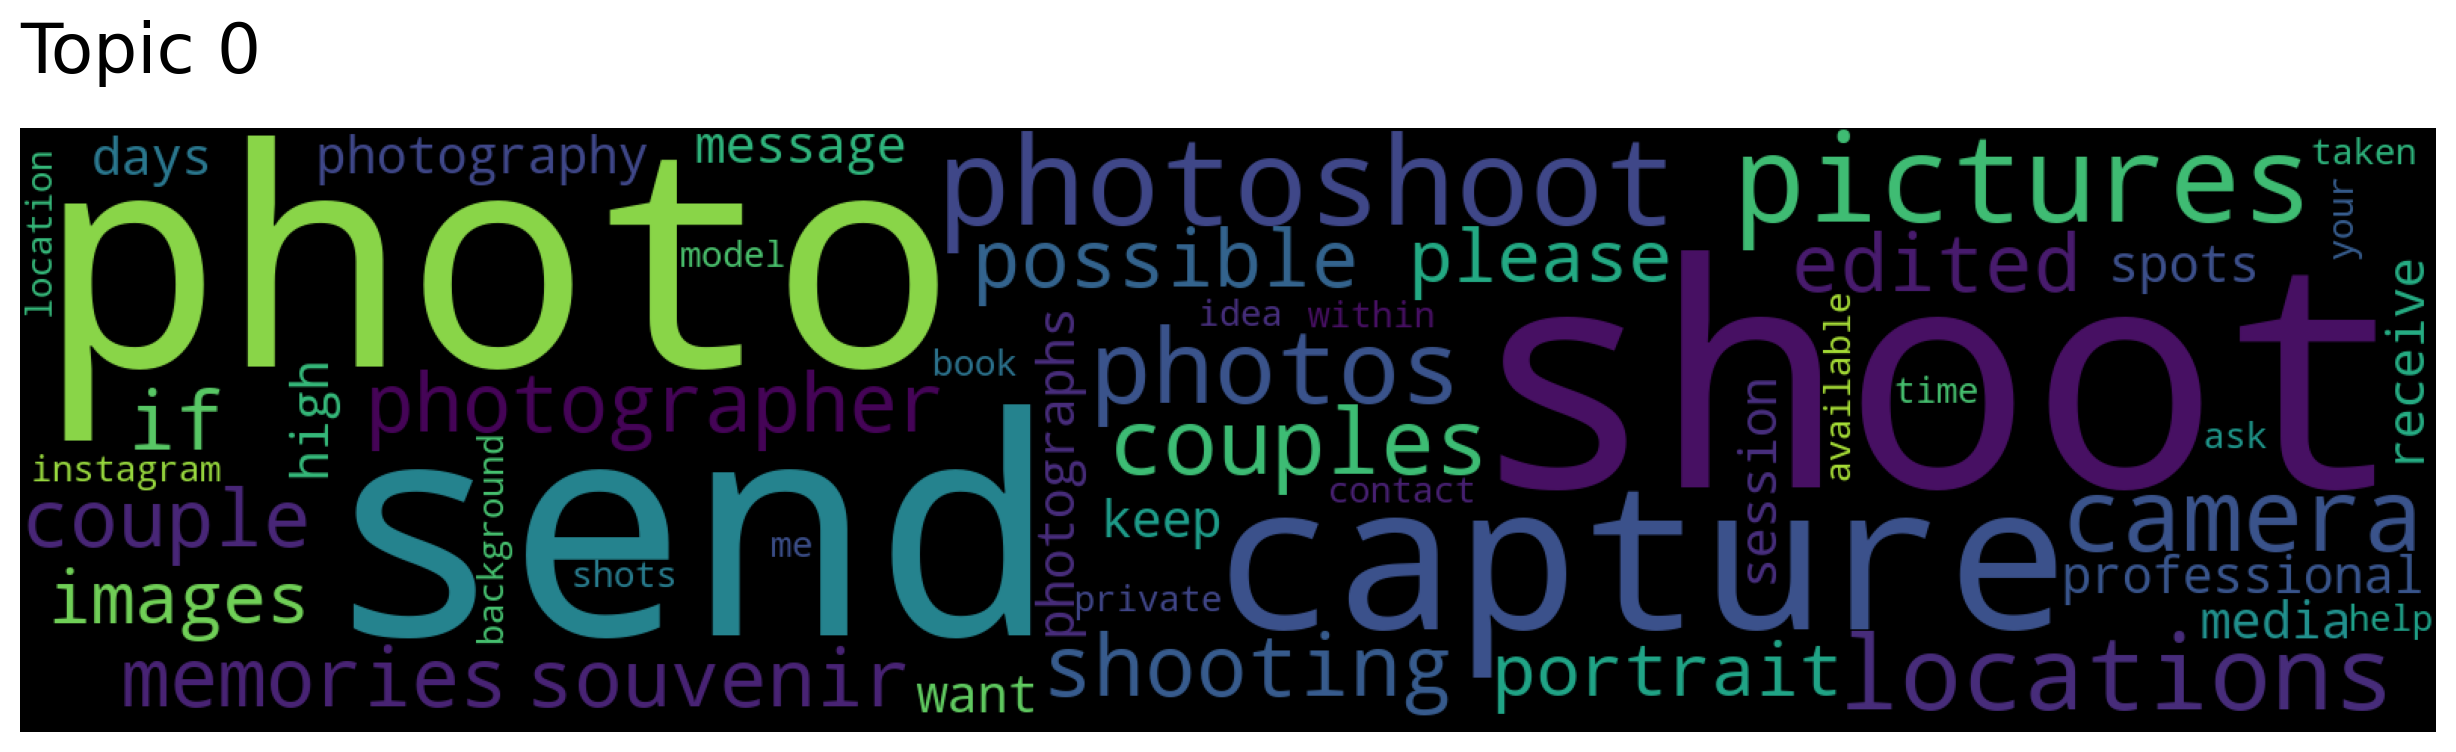

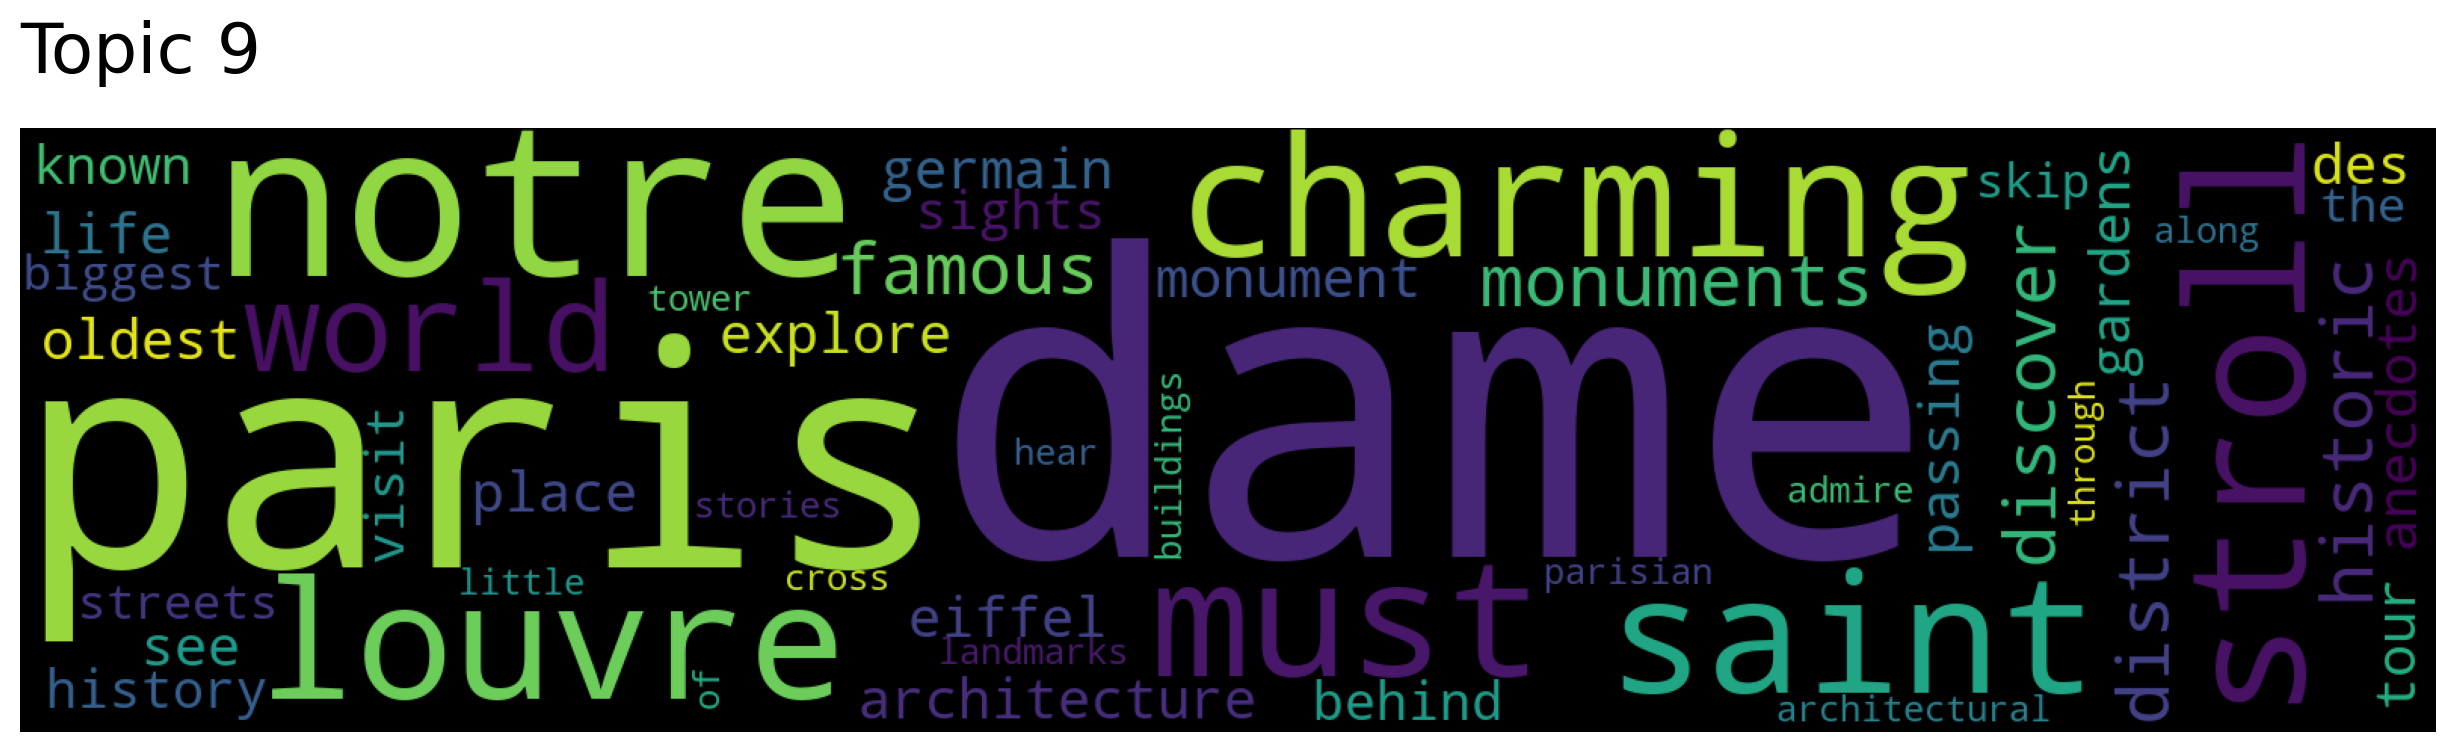

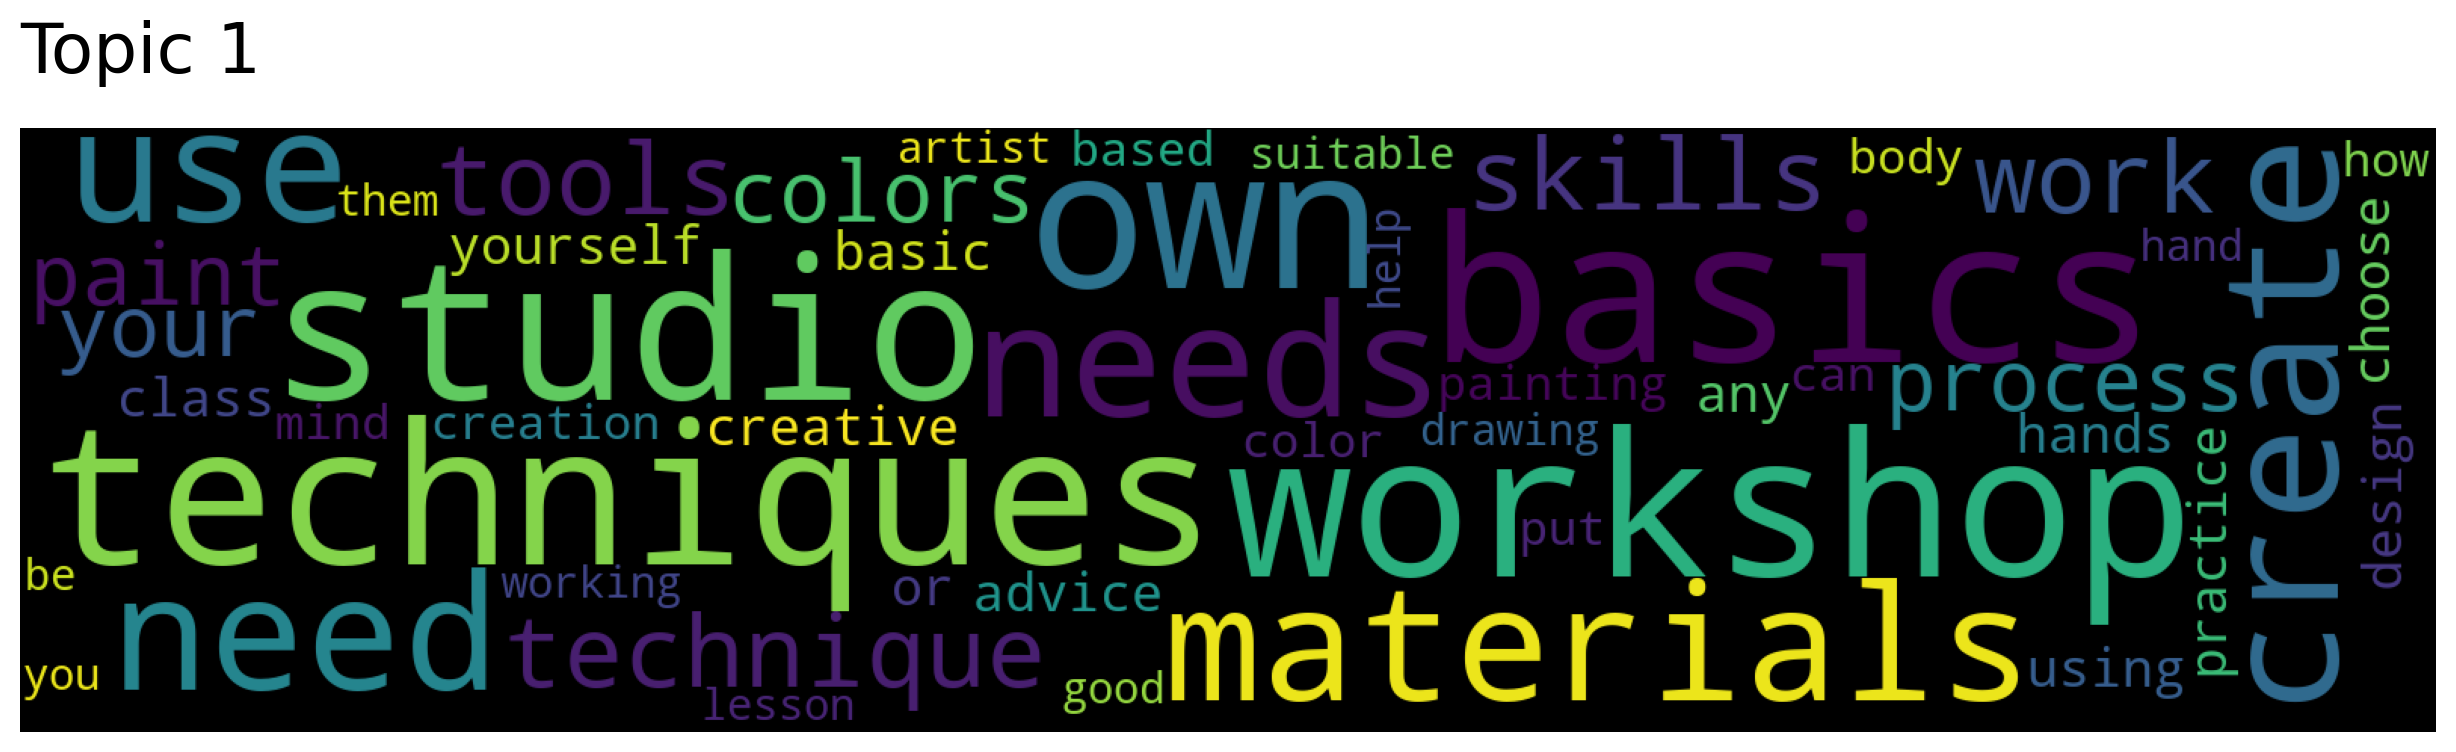

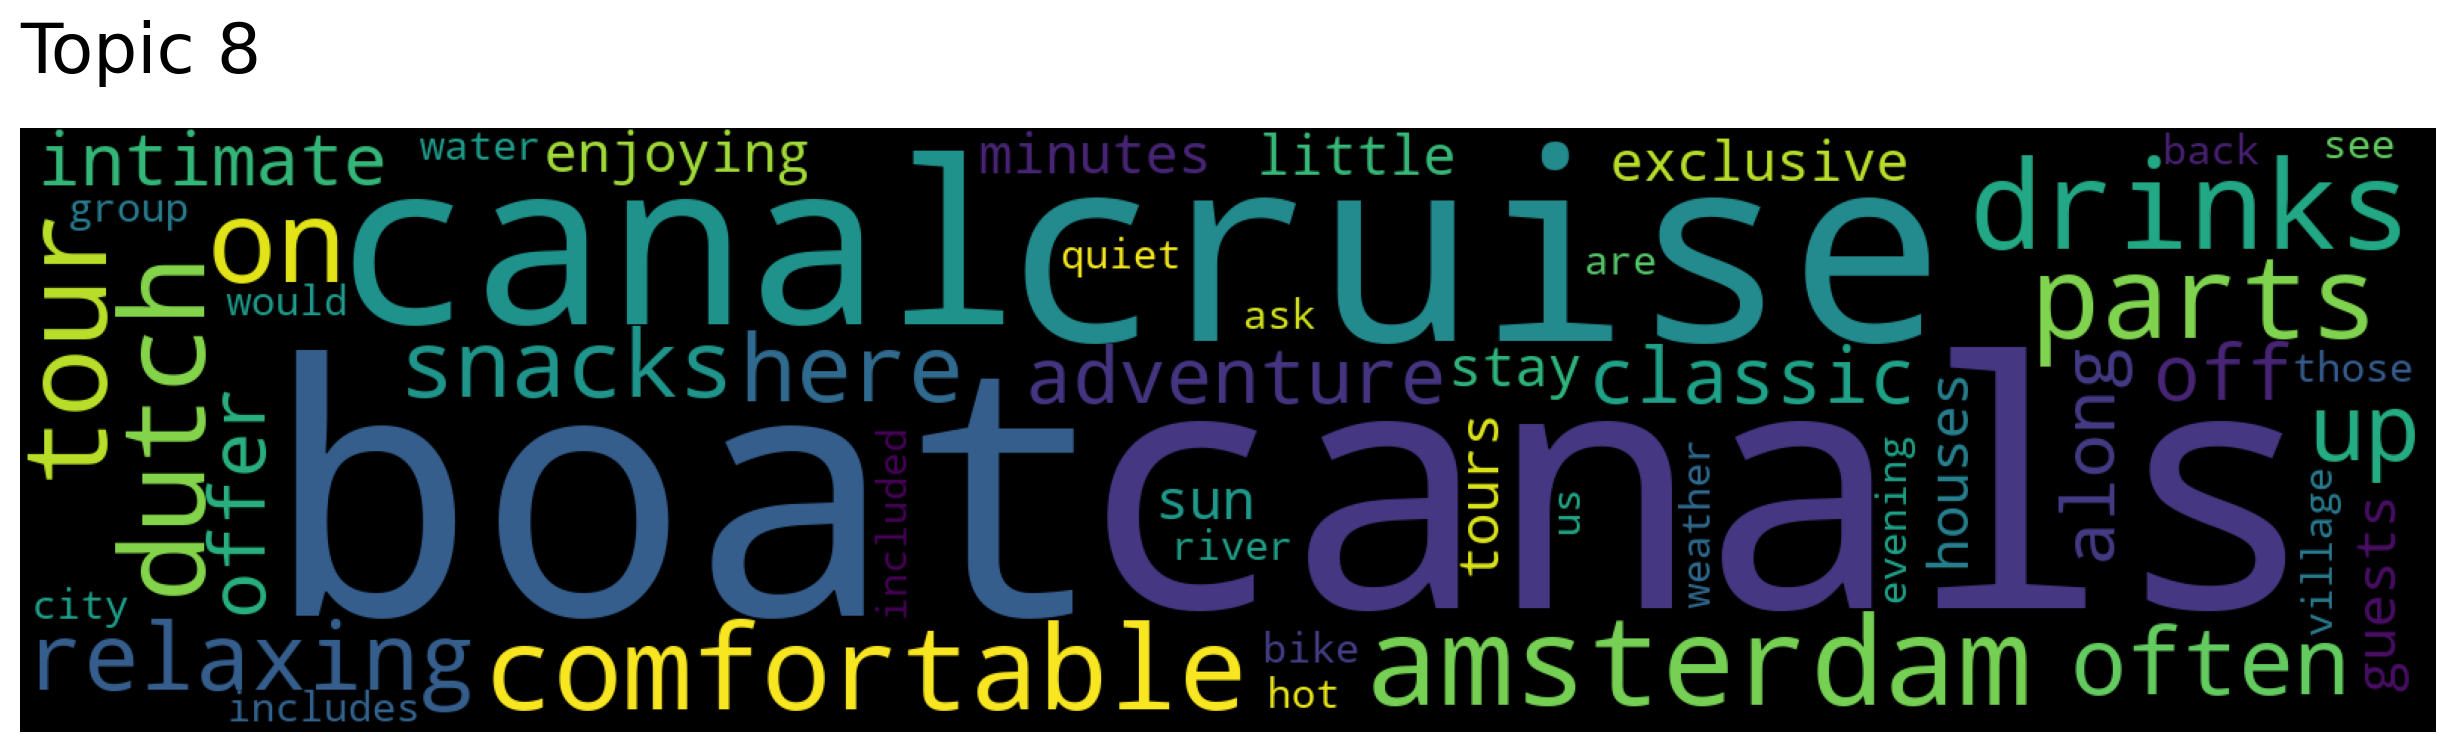

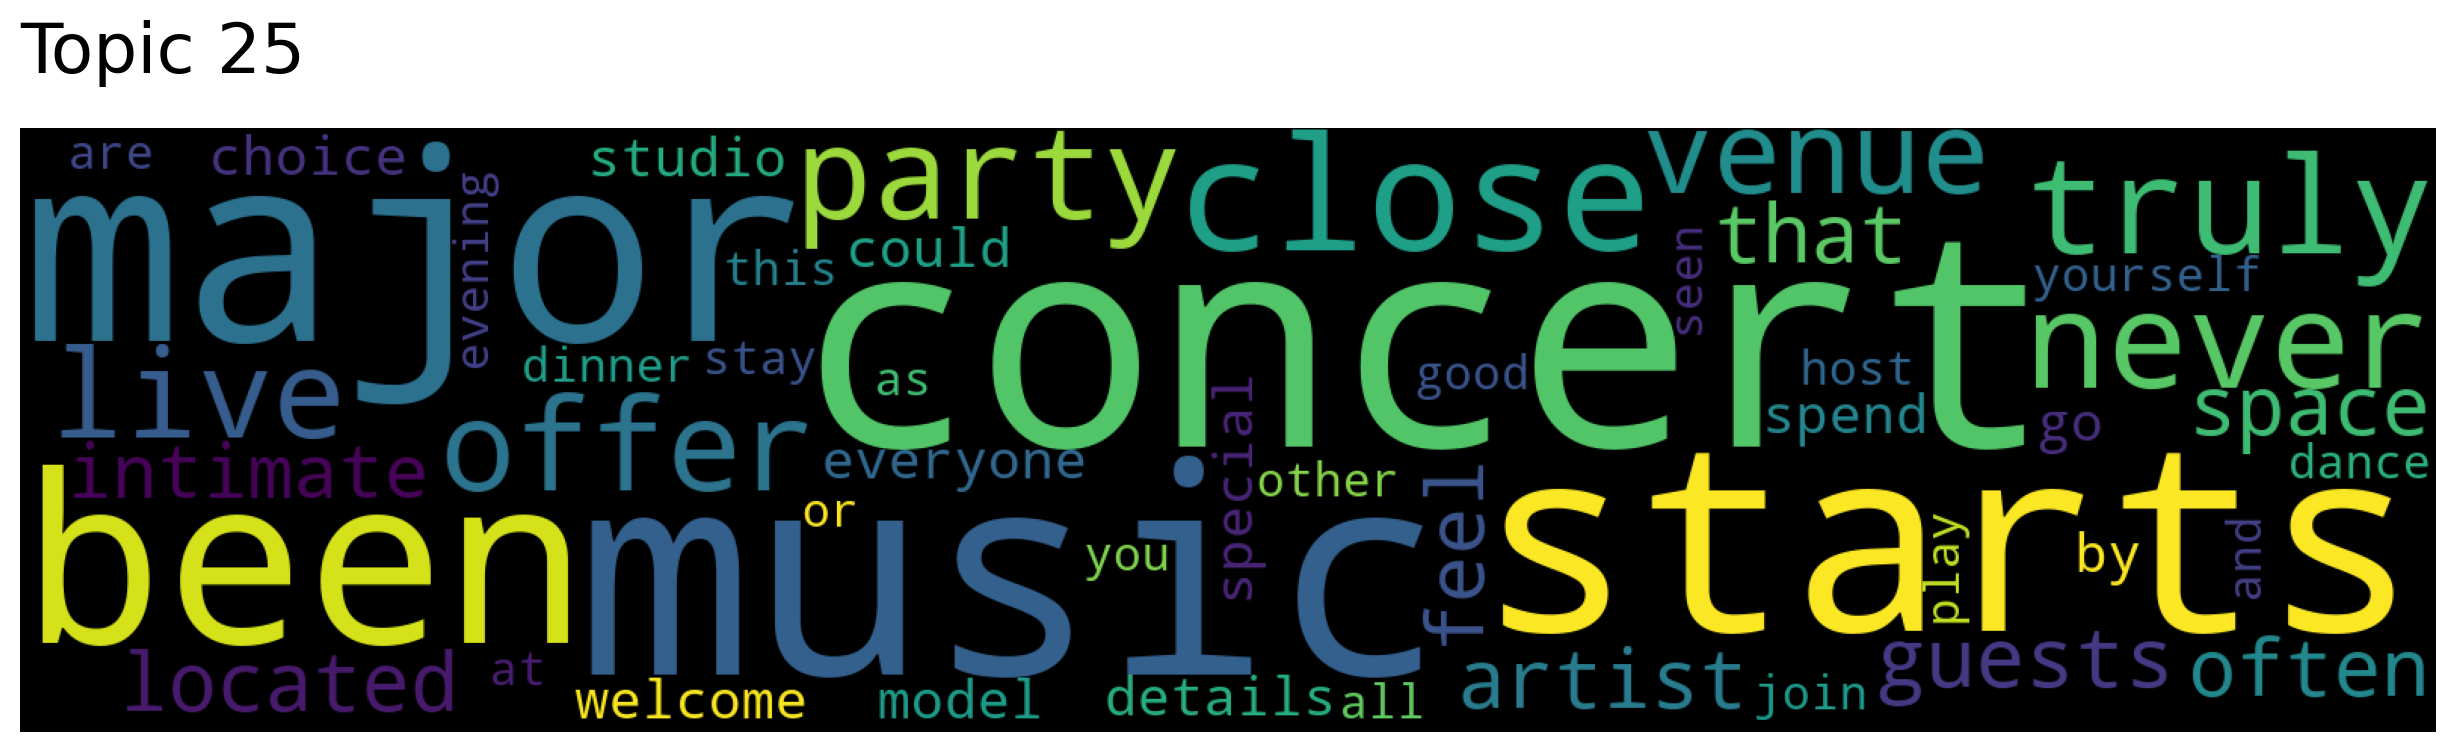

In [12]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["experience"], num_topics=5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

Wir suchen in Topic 1 nach den top 2 documents die dem Begriff "experience" am ähnlichsten sind

In [13]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=1, num_docs=2)

In [14]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=1, num_docs=2)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 1032, Score: 0.9109313488006592
-----------
In my crochet workshop, I will teach you from the basic skills of crochet to how to make pattern of your design. Before the workshop, you can discuss with me what colors of yarn you wold like to use and I will prepare for you. We will start from the magic ring to slip knot, the single crochet, one half double crochet, etc. In the end of the course, each one of you are able to finish one nice crochet work that done by yourself, such as a basket, a small carpet or a pot pad.
-----------

Document: 792, Score: 0.887707531452179
-----------
This class starts with an introduction to old and new resist-dyeing techniques so that you can kick-start your pattern-making adventure. We will make multiple samples on fabric, using plant colors only. Dyeing silk scarves in your own unique design will follow.
I will introduce you not only to pattern-making and shibori techniques but also to local plant dyes and the way they work. If you want to und

Semantic Search Documents by Keywords
Search documents for content semantically similar to workshop and fun.

In [15]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["workshop", "fun"], num_docs=2)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 1499, Score: 0.7330681085586548
-----------
You will learn how to plant your own  indoor vertical garden that you will  take with you  after the workshop. We will provide the materials for you to design, plant and create a a living vertical green arrangement. You also can just learn the technique and take the materials for you to do it at home. (we will pack it for you). 
Learn step by step about all the indoor plants and get shown special tips to create and maintain your very own living wall. You'll discover mini plants, moss, and nutrients which will bring your creation to life :-)
And at the end of the workshop take your masterpiece home with you!
-----------

Document: 771, Score: 0.7222256064414978
-----------
The fabric design workshop enables you to understand how pattern repeats work and to put this knowledge directly into practice.
Your host Hanna will guide you through the process of designing your own repeating motif using materials provided. You will also receive 

Similar Keywords
Search for similar words to "experience".

In [16]:
words, word_scores = model.similar_words(keywords=["workshop"], keywords_neg=[], num_words=10)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

materials 0.7627881881216183
create 0.67687321250239
technique 0.6434764277895291
using 0.6250763982756438
techniques 0.6208661049307852
choose 0.6116656274254579
process 0.6110046942704119
own 0.6097843217502549
creation 0.6083446450189135
yourself 0.6033301269650433


## Visualize documents - use dropdown to switch between cities

In [17]:
n_topic = 10
model.hierarchical_topic_reduction(n_topic)

[[5, 20, 15, 4],
 [0],
 [7, 2],
 [8, 3],
 [1],
 [13, 19, 22, 12],
 [11, 25, 6],
 [10, 18, 14],
 [16, 23, 17],
 [24, 21, 9]]

In [18]:
# Embedd document vectors
data = model.model.docvecs.vectors_docs
# data2d = umap.UMAP(n_neighbors=10, metric='cosine', min_dist=0.1, init='random', 
#                    random_state=42).fit_transform(data)
embedding = umap.UMAP(n_neighbors=10, metric='cosine', min_dist=0.1, init='random', 
                   random_state=42).fit_transform(data)
embedding = pd.DataFrame(embedding, columns=['x','y'])

# Get document text 
# documents = df.prep.to_list()

# Get topic words 
topic_words, word_scores, topic_nums = model.get_topics(n_topic, reduced=True)
# For visib. limit number of words to 20
twords = [(' ').join(t[:20]) for t in topic_words]
twords = np.asarray(twords)

# Get document2topic_id mapping
topic_id = model.doc_top_reduced

# Order topic words
twords_ordered = twords[topic_id]

In [19]:
df['TOPVEC_Topic'] = topic_id
df['TOPVEC_Topic_Keywords'] = twords_ordered
df['topic_string'] = topic_id

In [20]:
df = pd.concat([df, embedding],1 )

In [22]:
# Visualize with custom function
plot_main(df, num_topics=n_topic, save_name='results/TOPVEC_topics.html', model= 'TOPVEC')